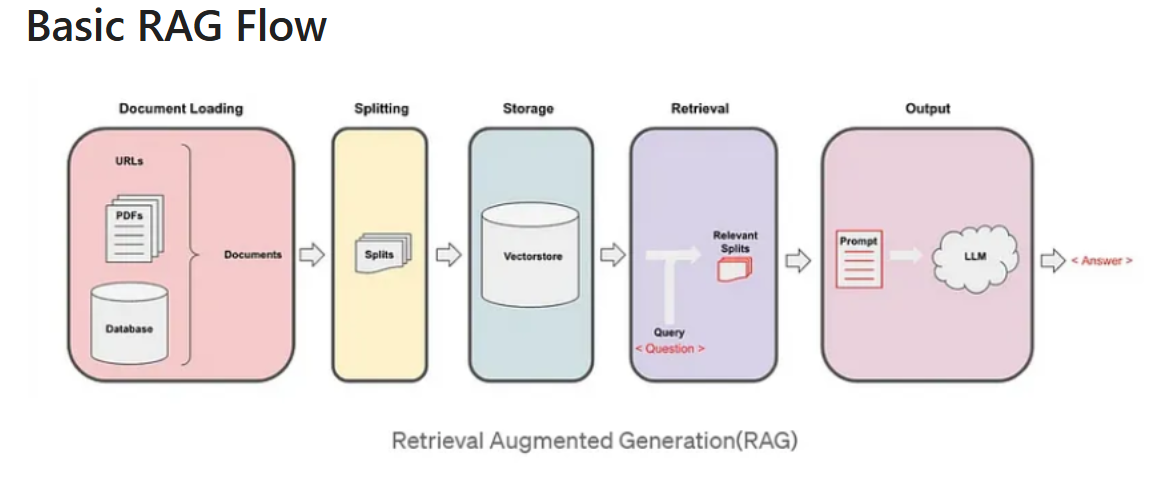

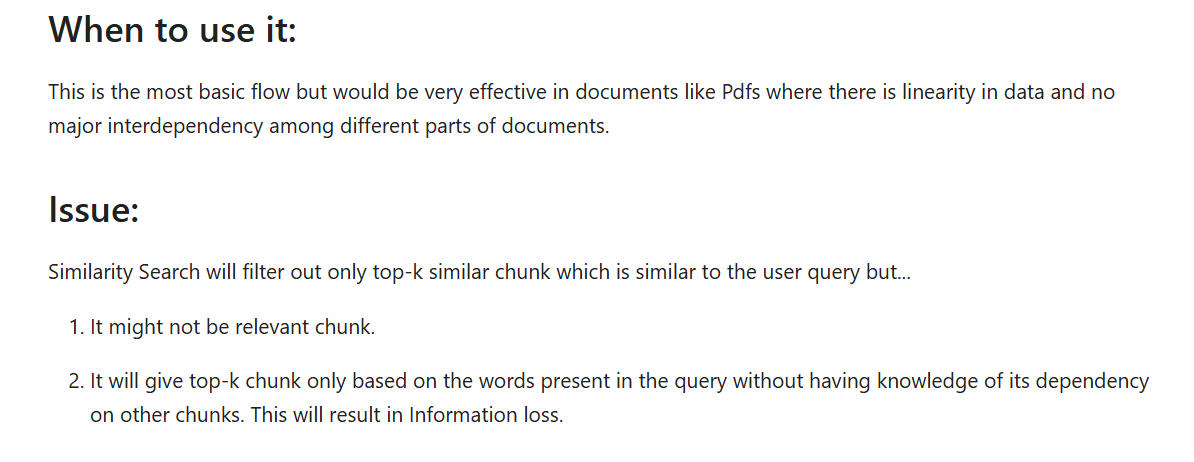

In [16]:
import os
from dotenv import load_dotenv
# Load the .env file
load_dotenv()
# Access environment variables
os.getenv("GOOGLE_API_KEY")

from langchain_google_genai import GoogleGenerativeAIEmbeddings
embedding = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

result = llm.invoke("Write a ballad about LangChain")
print(result.content)

The coder toiled, both night and day,
With APIs a tangled fray,
A thousand calls, a messy sprawl,
His logic prone to slip and fall.

He dreamed of chains, not forged of steel,
But links of thought, that would reveal
The wisdom hidden, deep inside
The data's vast and churning tide.

Then whispers came, upon the breeze,
Of LangChain's power, meant to appease
The weary soul, the fractured code,
A path to knowledge, smoothly trod.

He learned of LLMs, grand and bright,
That wove their words with dazzling light,
Of agents swift, and tools refined,
To shape the output to his mind.

He chained the prompts, with careful art,
And watched the language play its part,
From question posed, to answer clear,
The answers whispered in his ear.

He built a chatbot, quick and keen,
That served his users, ever seen,
A helpful guide, a friendly face,
With LangChain's magic, time and space.

He crafted tools for complex tasks,
Unraveling knots, removing masks,
From documents dense, to insights bright,
He br

In [3]:
from langchain_chroma import Chroma
from langchain_core.documents import Document
docs = [
    Document(
        page_content="A bunch of scientists bring back dinosaurs and mayhem breaks loose",
        metadata={"year": 1993, "rating": 7.7, "genre": "science fiction"},
    ),
    Document(
        page_content="Leo DiCaprio gets lost in a dream within a dream within a dream within a ...",
        metadata={"year": 2010, "director": "Christopher Nolan", "rating": 8.2},
    ),
    Document(
        page_content="A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea",
        metadata={"year": 2006, "director": "Satoshi Kon", "rating": 8.6},
    ),
    Document(
        page_content="A bunch of normal-sized women are supremely wholesome and some men pine after them",
        metadata={"year": 2019, "director": "Greta Gerwig", "rating": 8.3},
    ),
    Document(
        page_content="Toys come alive and have a blast doing so",
        metadata={"year": 1995, "genre": "animated"},
    ),
    Document(
        page_content="A hacker discovers reality is a simulation and leads a rebellion against the machines controlling it.",
        metadata={"year": 1999, "director": "Lana Wachowski, Lilly Wachowski", "rating": 8.7, "genre": "science fiction"},
    ),
    Document(
        page_content="A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.",
        metadata={"year": 1994, "rating": 8.5, "genre": "animated"},
    ),
    Document(
        page_content="Batman faces off against the Joker, a criminal mastermind who plunges Gotham into chaos.",
        metadata={"year": 2008, "director": "Christopher Nolan", "rating": 9.0, "genre": "action"},
    ),
    Document(
        page_content="A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.",
        metadata={"year": 2014, "director": "Christopher Nolan", "rating": 8.6, "genre": "science fiction"},
    )
]
vectorstore = Chroma.from_documents(docs, embedding)


In [4]:
question1 = "Which 1994 animated movie has a rating of 8.5?"
question2 = "Which movie features Batman facing off against the Joker and who directed it?"
question3 = "What genre is the movie 'The Matrix' and who directed it?"
vectorstore.similarity_search(question1)


[Document(id='caa1c84a-98ce-4c03-8f27-f0216cc3a9b4', metadata={'genre': 'animated', 'year': 1995}, page_content='Toys come alive and have a blast doing so'),
 Document(id='4cbab390-b8de-4d8a-b377-d1c02e916fc0', metadata={'genre': 'science fiction', 'rating': 7.7, 'year': 1993}, page_content='A bunch of scientists bring back dinosaurs and mayhem breaks loose'),
 Document(id='8961f89c-b0be-44f7-9b96-9ceb4326e74f', metadata={'genre': 'animated', 'rating': 8.5, 'year': 1994}, page_content='A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.'),
 Document(id='2da66e23-5048-49a8-891b-3d397813c6fc', metadata={'director': 'Christopher Nolan', 'rating': 8.2, 'year': 2010}, page_content='Leo DiCaprio gets lost in a dream within a dream within a dream within a ...')]

In [5]:
vectorstore.similarity_search(question2)


[Document(id='ab05b0cc-7577-4913-82d8-2e7262f1ca35', metadata={'director': 'Christopher Nolan', 'genre': 'action', 'rating': 9.0, 'year': 2008}, page_content='Batman faces off against the Joker, a criminal mastermind who plunges Gotham into chaos.'),
 Document(id='4e5d0100-2364-4645-bdd3-bafbb8b59a38', metadata={'director': 'Satoshi Kon', 'rating': 8.6, 'year': 2006}, page_content='A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea'),
 Document(id='4cbab390-b8de-4d8a-b377-d1c02e916fc0', metadata={'genre': 'science fiction', 'rating': 7.7, 'year': 1993}, page_content='A bunch of scientists bring back dinosaurs and mayhem breaks loose'),
 Document(id='2da66e23-5048-49a8-891b-3d397813c6fc', metadata={'director': 'Christopher Nolan', 'rating': 8.2, 'year': 2010}, page_content='Leo DiCaprio gets lost in a dream within a dream within a dream within a ...')]

In [6]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})


In [ ]:


from operator import itemgetter
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough


In [9]:
import textwrap
def wrap_text(text, width=90): #preserve_newlines
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

In [10]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

In [22]:
from langchain_core.prompts import ChatPromptTemplate

from langchain_core.output_parsers import StrOutputParser

prompt = ChatPromptTemplate.from_template(template)


chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

text_reply = chain.invoke({"context": retriever.invoke(question1), "question": question1})


text_reply

TypeError: expected string or bytes-like object, got 'dict'

AttributeError: module 'google.generativeai.types' has no attribute 'MessageDict'